<a href="https://colab.research.google.com/github/MeeraVenugopal/PRODIGY_ML_01/blob/main/PRODIGY_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRODIGY_ML_01**

Implementing a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/House Price Prediction.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [ ]:
df.drop(['date','street','city','country'],axis=1,inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,WA 98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,WA 98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,WA 98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,WA 98178


In [ ]:
for i in df['yr_renovated']:
  if i!=0:
    df['yr_renovated']=df['yr_renovated'].replace(i,2024-i)

df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,19,WA 98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,32,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,45,WA 98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,15,WA 98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,WA 98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,WA 98178


In [ ]:
df['statezip']=df['statezip'].str.replace('WA','')
df['statezip']=df['statezip'].astype(int)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,19,98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,32,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,45,98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,15,98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,98178


In [ ]:
df.drop(['waterfront','view'],axis=1,inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,3,1340,0,1955,19,98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,5,3370,280,1921,0,98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0,98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0,98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,4,1140,800,1976,32,98052
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,4,1510,0,1954,45,98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,3,1460,0,1983,15,98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,3,3010,0,2009,0,98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,3,1070,1020,1974,0,98178


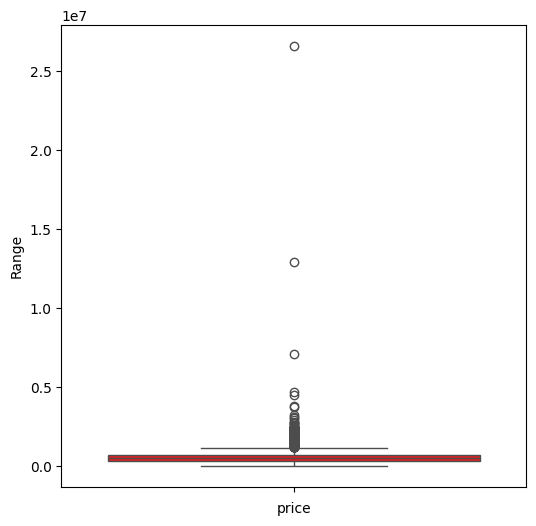

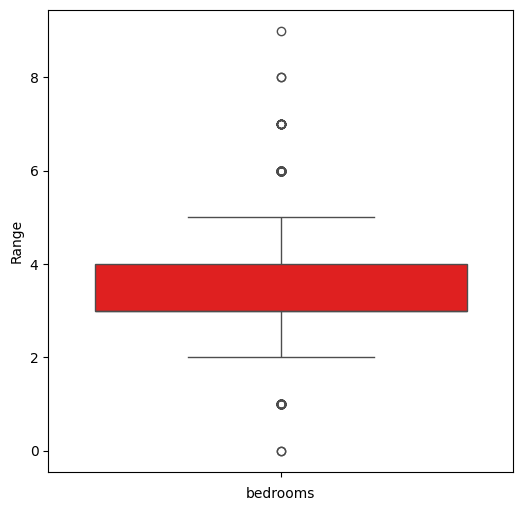

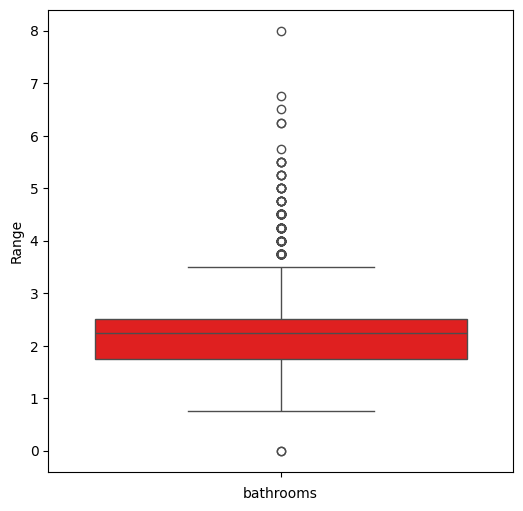

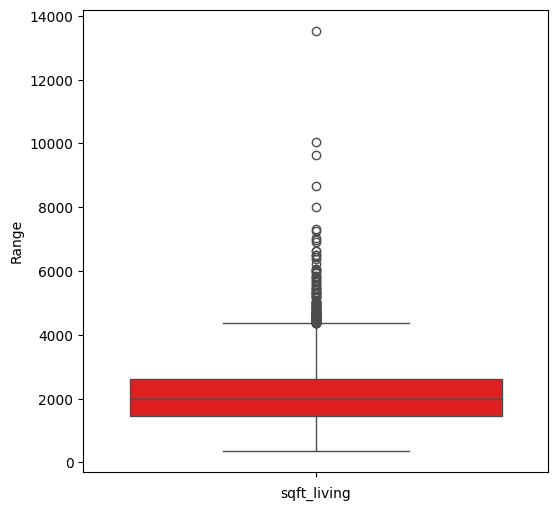

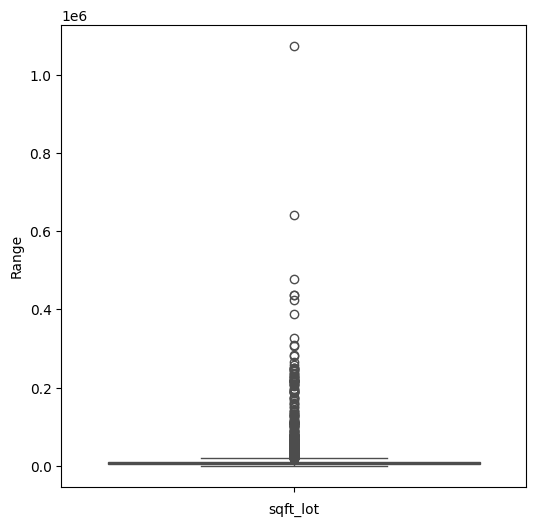

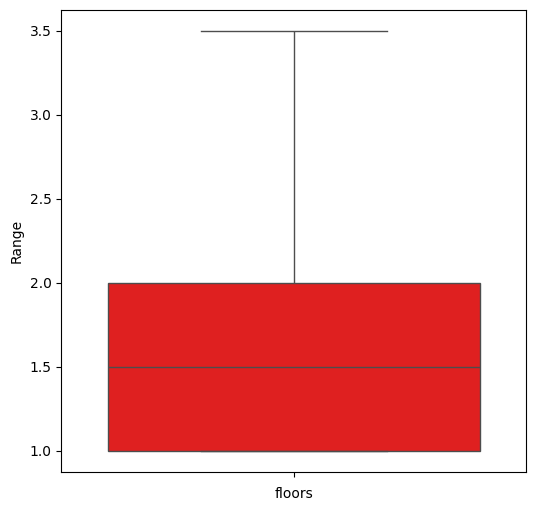

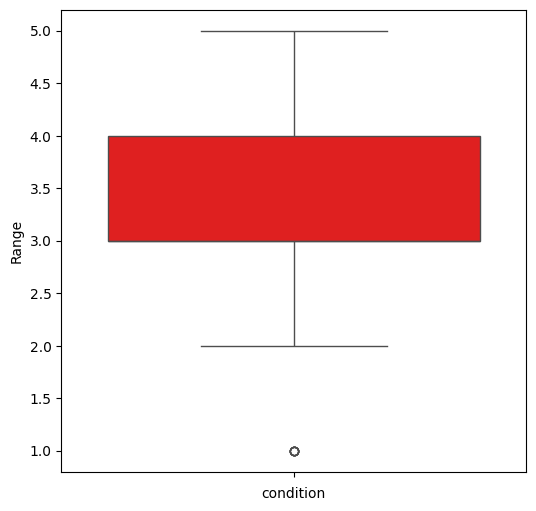

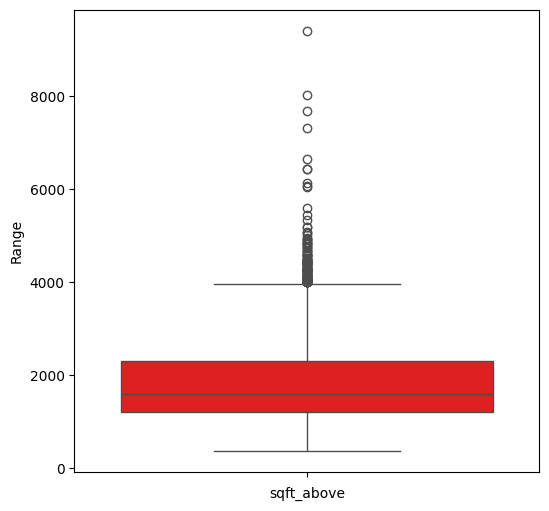

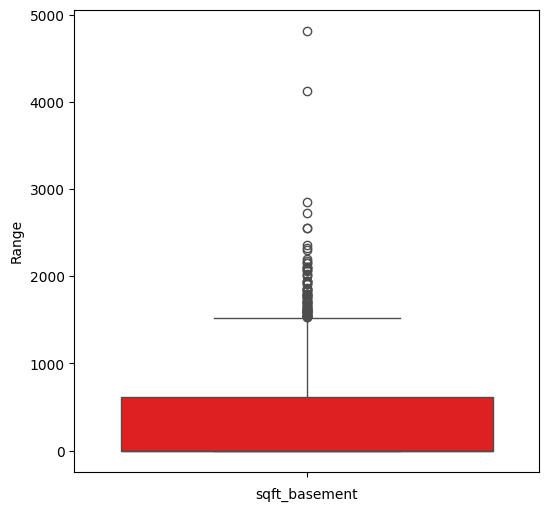

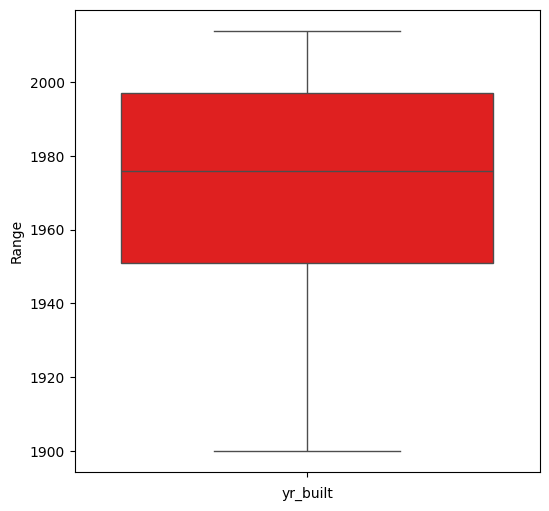

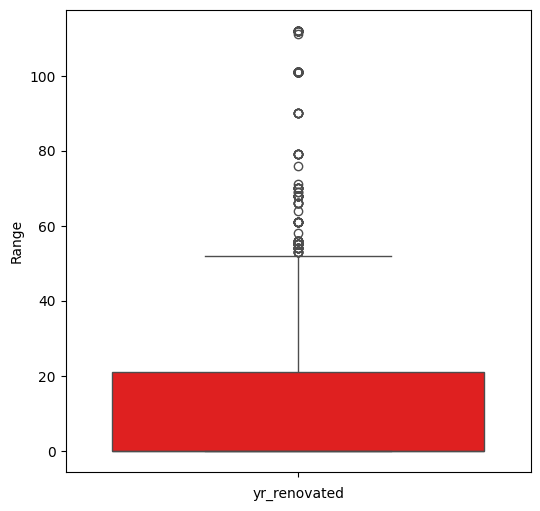

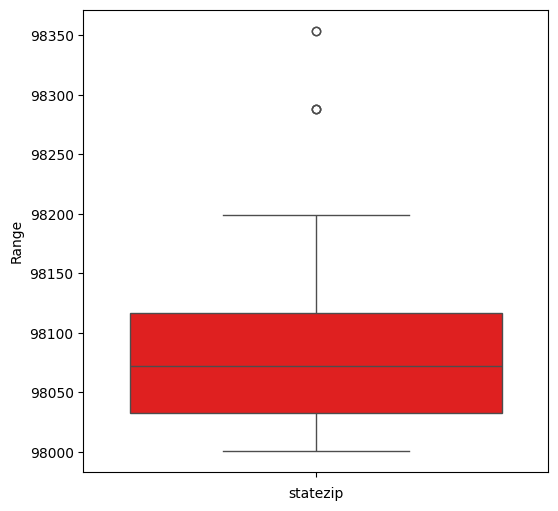

In [ ]:
for i in df.columns:
  plt.figure(figsize=(6,6))
  sns.boxplot(df[i],color='red')
  plt.xlabel(i)
  plt.ylabel('Range')

In [ ]:
q1=df.quantile(0.25)
q2=df.quantile(0.75)
IQR=q2-q1
max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)
df=pd.DataFrame(np.where(df>max_limit,max_limit,(np.where(df<min_limit,min_limit,df))),columns=df.columns)

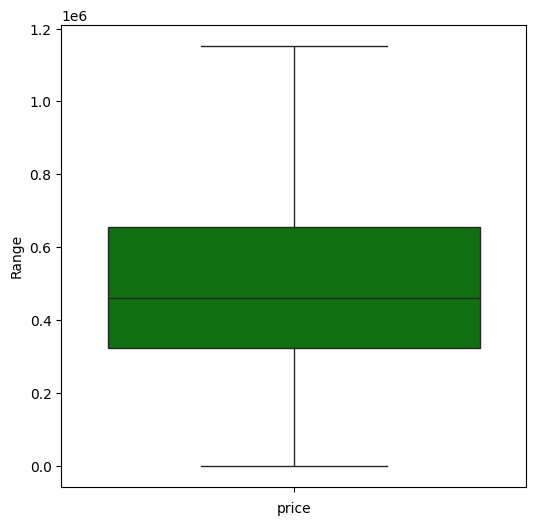

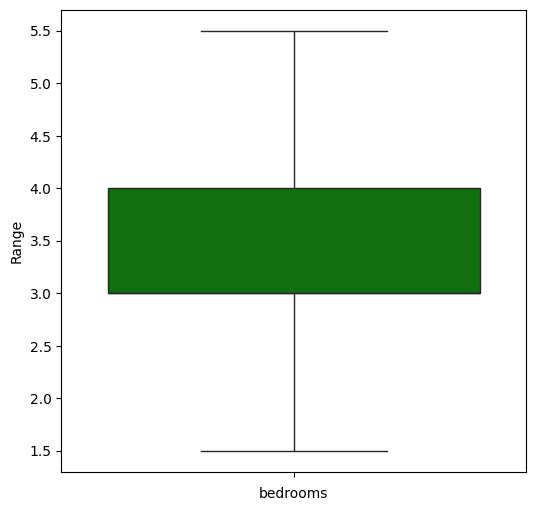

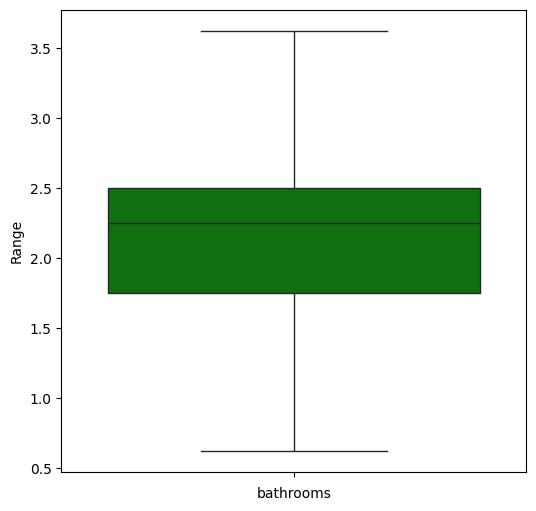

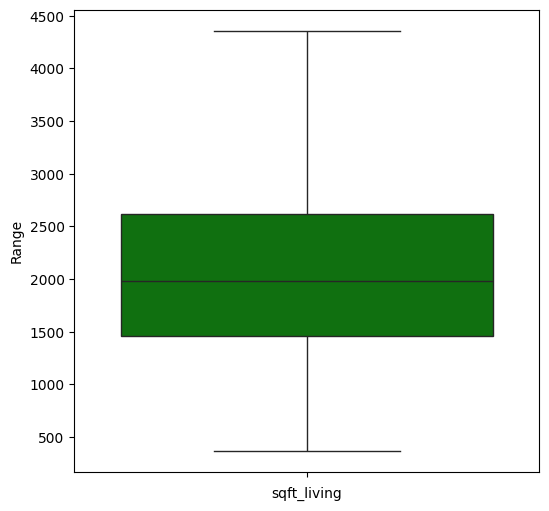

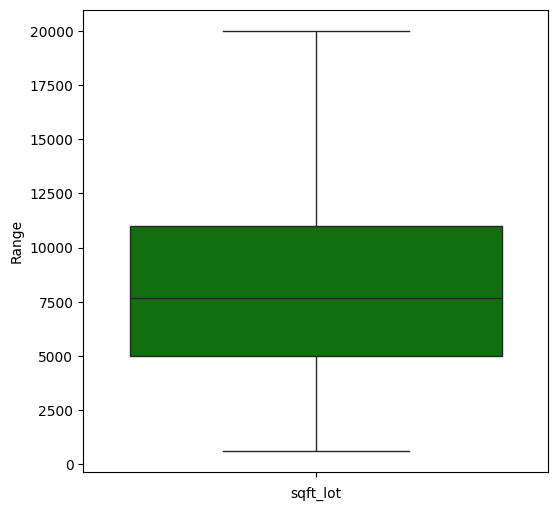

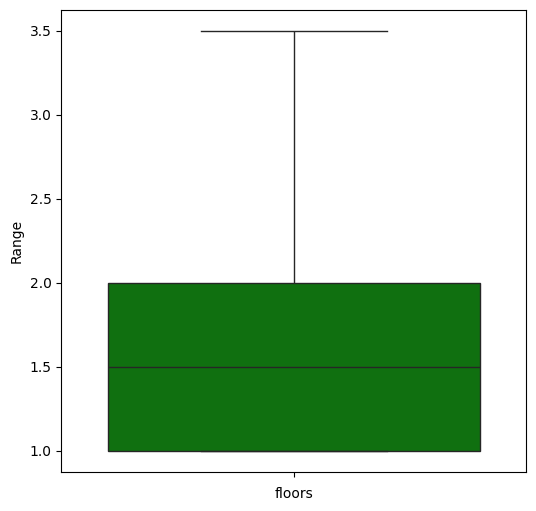

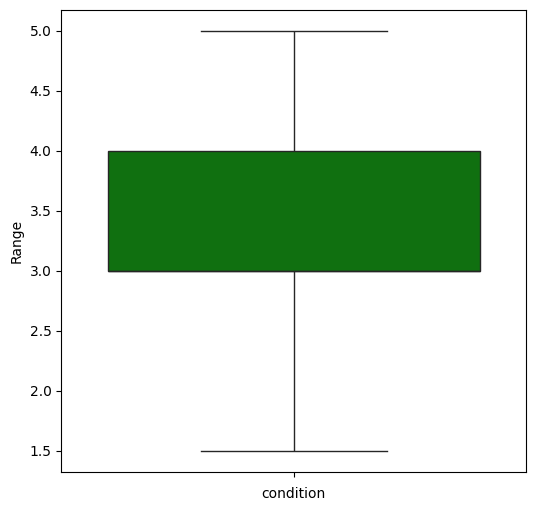

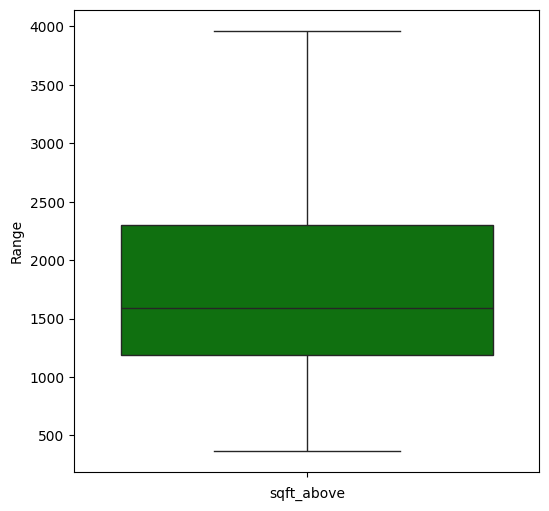

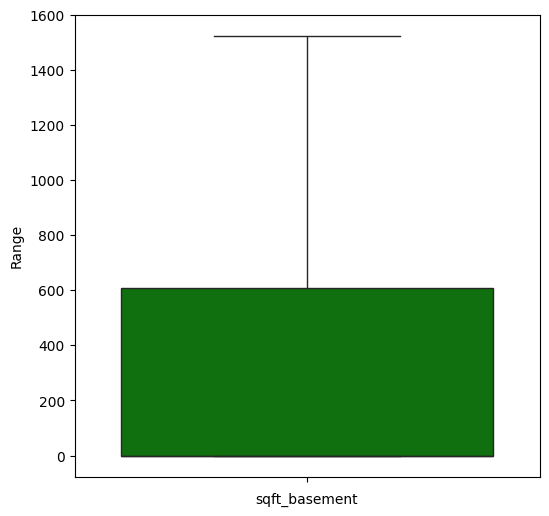

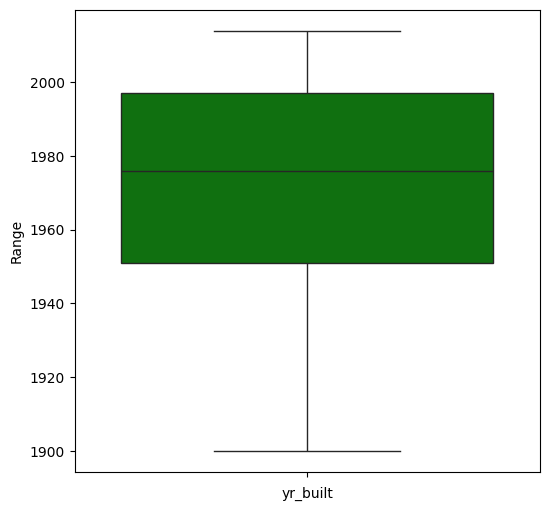

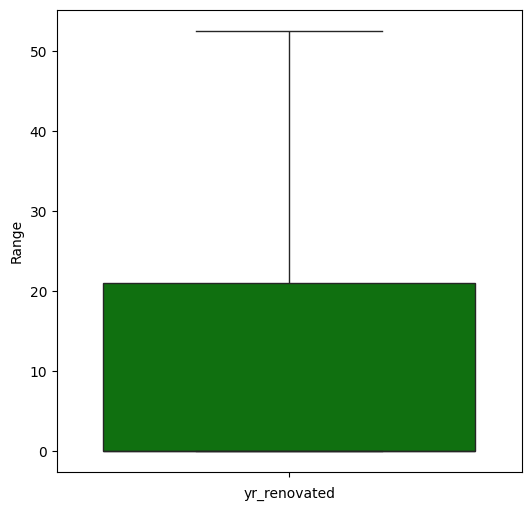

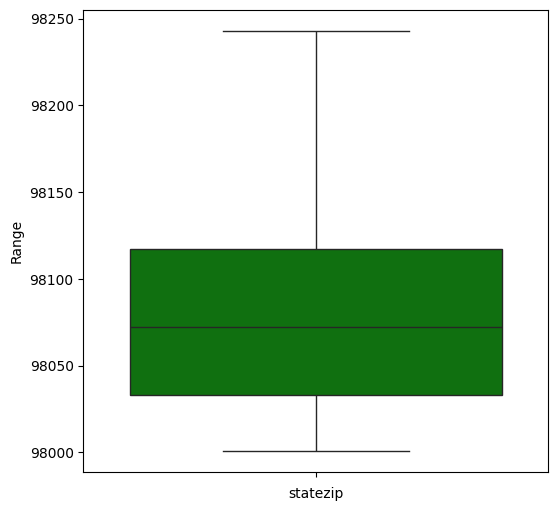

In [ ]:
for i in df.columns:
  plt.figure(figsize=(6,6))
  sns.boxplot(df[i],color='green')
  plt.xlabel(i)
  plt.ylabel('Range')

<Axes: >

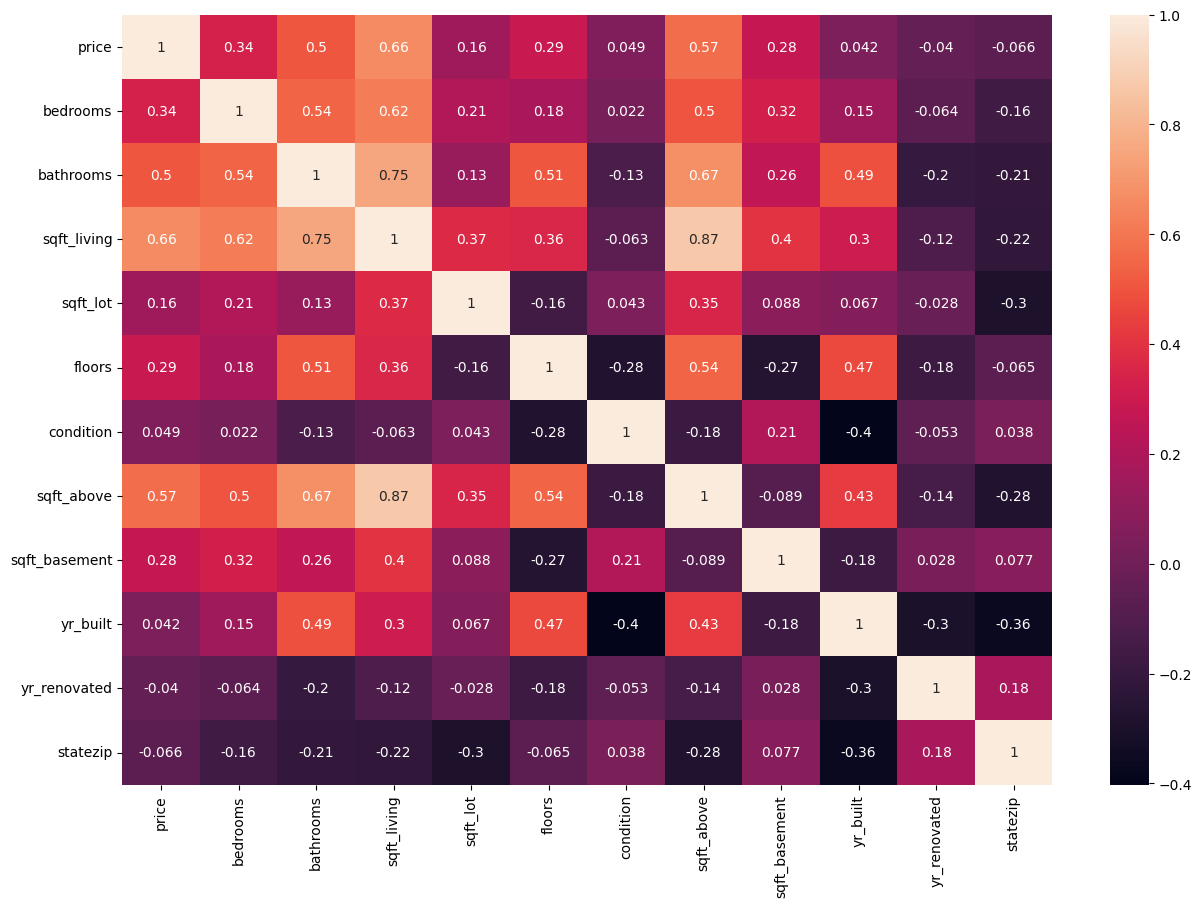

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
x=df.drop('price',axis=1)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,3.0,1.50,1340.0,7912.0,1.5,3.0,1340.0,0.0,1955.0,19.0,98133.0
1,5.0,2.50,3650.0,9050.0,2.0,5.0,3370.0,280.0,1921.0,0.0,98119.0
2,3.0,2.00,1930.0,11947.0,1.0,4.0,1930.0,0.0,1966.0,0.0,98042.0
3,3.0,2.25,2000.0,8030.0,1.0,4.0,1000.0,1000.0,1963.0,0.0,98008.0
4,4.0,2.50,1940.0,10500.0,1.0,4.0,1140.0,800.0,1976.0,32.0,98052.0
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510.0,6360.0,1.0,4.0,1510.0,0.0,1954.0,45.0,98133.0
4596,3.0,2.50,1460.0,7573.0,2.0,3.0,1460.0,0.0,1983.0,15.0,98007.0
4597,3.0,2.50,3010.0,7014.0,2.0,3.0,3010.0,0.0,2009.0,0.0,98059.0
4598,4.0,2.00,2090.0,6630.0,1.0,3.0,1070.0,1020.0,1974.0,0.0,98178.0


In [ ]:
y=df['price']
y

,price
0,3.130000e+05
1,1.153094e+06
2,3.420000e+05
3,4.200000e+05
4,5.500000e+05
5,4.900000e+05
6,3.350000e+05
7,4.820000e+05
8,4.525000e+05
9,6.400000e+05


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
2194,5.5,1.50,1930.0,8400.0,1.0,3.0,1030.0,900.0,1971.0,0.0,98146.0
958,2.0,2.25,1230.0,1280.0,2.0,3.0,960.0,270.0,2012.0,52.5,98144.0
1533,3.0,1.50,1470.0,14821.0,1.0,4.0,1470.0,0.0,1958.0,52.0,98042.0
654,4.0,2.50,2700.0,4004.0,2.0,3.0,2700.0,0.0,2004.0,21.0,98029.0
1497,2.0,1.00,740.0,9003.0,1.0,3.0,740.0,0.0,1949.0,26.0,98031.0
...,...,...,...,...,...,...,...,...,...,...,...
4426,3.0,1.00,1180.0,5002.0,1.5,3.0,1180.0,0.0,1946.0,0.0,98155.0
466,4.0,2.00,2520.0,6000.0,1.0,3.0,1400.0,1120.0,1921.0,17.0,98103.0
3092,3.0,1.00,1150.0,8145.0,1.0,4.0,990.0,160.0,1932.0,52.5,98155.0
3772,2.0,1.00,910.0,2002.0,1.5,3.0,910.0,0.0,1900.0,19.0,98112.0


In [ ]:
x_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
3683,3.0,2.50,1460.0,1613.0,2.0,3.0,1180.0,280.0,2007.0,0.0,98117.0
4411,5.0,2.25,2000.0,7900.0,1.0,4.0,1300.0,700.0,1986.0,0.0,98188.0
2584,3.0,3.25,2940.0,5432.0,3.0,4.0,2440.0,500.0,1978.0,24.0,98109.0
69,3.0,2.50,2200.0,7350.0,1.0,5.0,1570.0,630.0,1988.0,0.0,98058.0
1844,3.0,2.50,1720.0,8755.0,1.0,3.0,1000.0,720.0,1983.0,15.0,98023.0
...,...,...,...,...,...,...,...,...,...,...,...
3437,5.5,3.50,3600.0,6875.0,2.0,3.0,2740.0,860.0,2004.0,21.0,98065.0
3340,4.0,2.50,3920.0,12415.0,2.0,3.0,3920.0,0.0,1997.0,0.0,98075.0
1289,3.0,2.00,1490.0,8371.0,1.5,3.0,1490.0,0.0,1984.0,0.0,98031.0
449,3.0,1.75,1780.0,20002.0,1.0,4.0,1780.0,0.0,1979.0,0.0,98019.0


In [ ]:
y_train

,price
2194,1.750000e+05
958,3.870000e+05
1533,2.640000e+05
654,7.230000e+05
1497,1.575000e+05
3844,4.810150e+05
2337,4.270000e+05
1703,9.850000e+05
411,2.700000e+05
1744,4.950000e+05


In [ ]:
y_test

,price
3683,5.440000e+05
4411,0.000000e+00
2584,1.153094e+06
69,3.650000e+05
1844,2.750000e+05
33,6.250000e+05
3085,4.530000e+05
4034,3.000000e+05
4469,4.179857e+05
4578,6.725000e+05


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2_score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE: 36143475228.56837
R2_score: 0.46952345794332273
MAE: 142001.8575292621
MAPE: 2.845192358118199e+19
RMSE: 190114.37407142145


In [ ]:
df1=pd.DataFrame({'actual':y_test,'predicted':y_pred,'diff':y_test-y_pred})
df1

,actual,predicted,diff
3683,544000.00,359745.283078,184254.716922
4411,0.00,357735.114297,-357735.114297
2584,1153093.75,863531.449900,289562.300100
69,365000.00,546198.167662,-181198.167662
1844,275000.00,390450.462703,-115450.462703
...,...,...,...
3437,620000.00,749636.164317,-129636.164317
3340,770000.00,865576.557753,-95576.557753
1289,255000.00,353147.366717,-98147.366717
449,336900.00,381372.716193,-44472.716193


In [ ]:
test=x[4596:4597]
test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
4596,3.0,2.5,1460.0,7573.0,2.0,3.0,1460.0,0.0,1983.0,15.0,98007.0


In [ ]:
prediction=lr.predict(test)
print('Predicted price of house is',prediction[0])
print('Actual price of house is',df['price'][3])

Predicted price of house is 403989.55369273294
Actual price of house is 420000.0
